In [3]:
import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
final_table = pd.read_csv('/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/raw_nav_data.csv')

In [13]:
len(final_table['scheme_name'].unique())

12089

In [14]:
final_table.shape

(22524414, 7)

In [15]:
final_table.head()

,date,nav,scheme_code,scheme_name,category,scheme_type,daily_return
0,2006-04-04,10.0796,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes,0.000218
1,2006-04-05,10.0836,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes,0.000397
2,2006-04-07,10.0856,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes,0.000198
3,2006-04-10,10.0906,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes,0.000496
4,2006-04-12,10.0924,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes,0.000178


In [16]:
final_table.tail()

,date,nav,scheme_code,scheme_name,category,scheme_type,daily_return
22524409,2025-10-24,9.6848,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes,0.001779
22524410,2025-10-27,9.8261,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes,0.014590
22524411,2025-10-28,9.7221,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes,-0.010584
22524412,2025-10-29,9.7830,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes,0.006264
22524413,2025-10-30,9.7869,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes,0.000399


In [17]:
df = pd.read_csv("/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/raw_nav_data.csv")
print(f"Initial Row count :{len(df)}")

Initial Row count :22524414


In [20]:
# Convert 'date' from text to a real business object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [21]:
# Convert NAV to numbers and coerce means if broken value is present (like 'N/A' then turn it into NaN)
df['nav'] = pd.to_numeric(df['nav'], errors='coerce')

In [22]:
df.dropna(subset=["nav"], inplace = True)

In [23]:
# Ingnoring the "Close Ended" funds because they can't buy/sell easily. Only keeping Open Endedd
df = df[df['scheme_type'].str.contains("Open", na=False)]

In [24]:
# To calculate Growth compare today vs Yesterday
df = df.sort_values(by=['scheme_code','date'], ascending=[True, True])

In [25]:
# This line calculates the day-to-day percentage return of NAV for each mutual fund separately, ensuring a fund’s NAV is compared only with its own previous day value.
df['daily_return'] = df.groupby('scheme_code')['nav'].pct_change()
# Remove the first row of every fund (as it will be nan)
df.dropna(subset=['daily_return'], inplace = True)


In [27]:
df.to_csv("/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/nav_data.csv", index =False)

In [28]:
print(df.head())

        date      nav  scheme_code  \
1 2006-04-05  10.0836       100027   
2 2006-04-07  10.0856       100027   
3 2006-04-10  10.0906       100027   
4 2006-04-12  10.0924       100027   
5 2006-04-13  10.0941       100027   

                                         scheme_name category  \
1  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
2  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
3  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
4  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
5  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   

          scheme_type  daily_return  
1  Open Ended Schemes      0.000397  
2  Open Ended Schemes      0.000198  
3  Open Ended Schemes      0.000496  
4  Open Ended Schemes      0.000178  
5  Open Ended Schemes      0.000168  


In [29]:
fund_profile = df.groupby('scheme_name')['daily_return'].agg(['mean','std','min','max','count'])

In [30]:
# Renaming the columns to make them business-friendly
# std is how much the price jumps up and down
fund_profile.columns = ['Average_Return','Risk_Volatility','Worst_Day','Best_Day','Days_Active']

In [31]:
# Only look for funds with one year of Data (approx 252 trading days) as a fund that started last week cannot be accurately ranked
fund_profile = fund_profile[fund_profile['Days_Active'] > 250]

In [32]:
print(fund_profile.head())

                                                    Average_Return  \
scheme_name                                                          
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW         0.000474   
360 ONE Balanced Hybrid Fund - Regular Plan - G...        0.000412   
360 ONE Balanced Hybrid Fund- Direct Plan - Growth        0.000474   
360 ONE Balanced Hyrbrid fund - Regular Plan - ...        0.000412   
360 ONE Dynamic Bond Fund - Regular Plan - Grow...        0.000281   

                                                    Risk_Volatility  \
scheme_name                                                           
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW          0.004322   
360 ONE Balanced Hybrid Fund - Regular Plan - G...         0.004320   
360 ONE Balanced Hybrid Fund- Direct Plan - Growth         0.004322   
360 ONE Balanced Hyrbrid fund - Regular Plan - ...         0.004320   
360 ONE Dynamic Bond Fund - Regular Plan - Grow...         0.001714   

           

In [33]:
# Removing Outliers
fund_profile_clean  = fund_profile[(fund_profile['Best_Day'] < 0.10) & (fund_profile['Worst_Day'] > -0.10)]

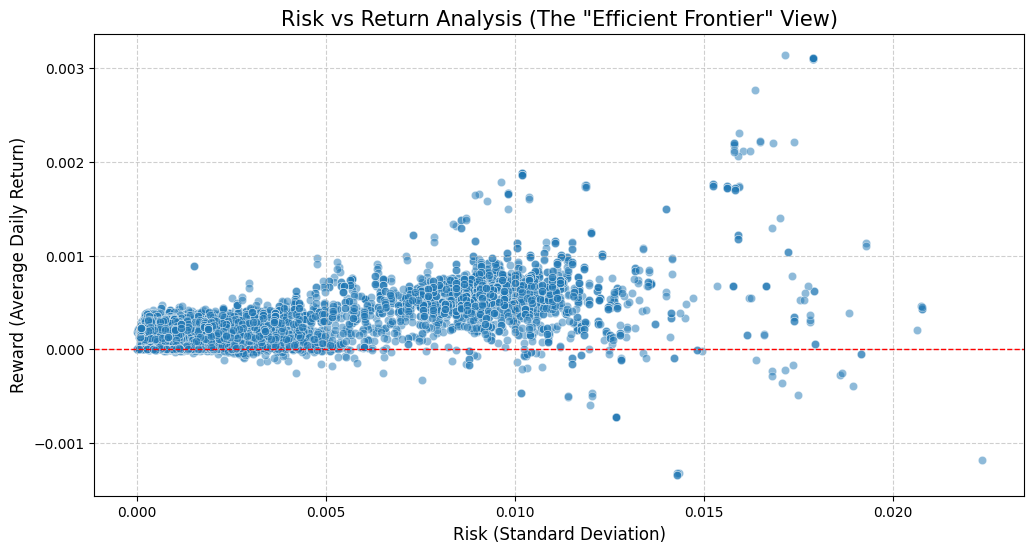

In [34]:
# Visualiaztion Risk vs Return
plt.figure(figsize=(12,6))
sns.scatterplot(data=fund_profile_clean, x="Risk_Volatility", y='Average_Return', alpha = 0.5)
plt.title('Risk vs Return Analysis (The "Efficient Frontier" View)', fontsize=15)
plt.xlabel('Risk (Standard Deviation)', fontsize=12)
plt.ylabel('Reward (Average Daily Return)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
# Add a horizontal line at 0 (Break-even point)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

Visualising Distribution for Top Fund : Tata Silver Exchange Traded Fund


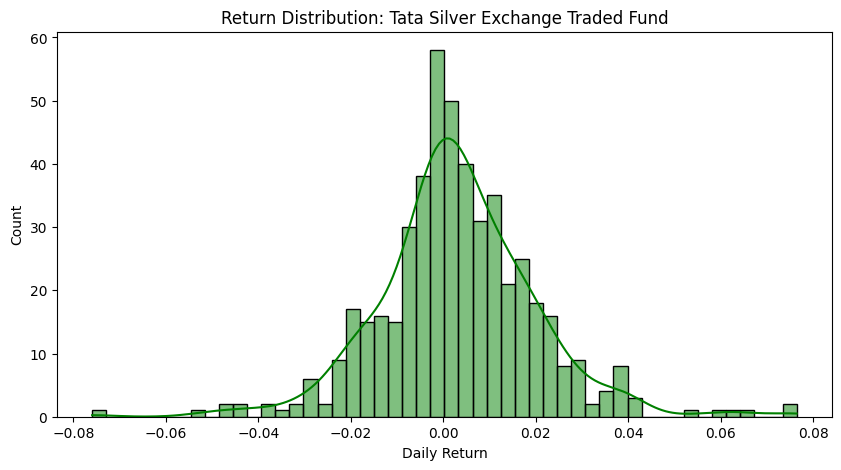

In [35]:
# Returns Distributed among the Top Funds
top_fund_name = fund_profile_clean['Average_Return'].idxmax()
print(f"Visualising Distribution for Top Fund : {top_fund_name}")
# Filtering Data for that fund
top_fund_data = df[df['scheme_name'] == top_fund_name]
plt.figure(figsize=(10, 5))
# bins = split data in 50 bars , kde = add a smooth curve showing distribution
sns.histplot(top_fund_data['daily_return'], kde=True, bins=50, color='green')
plt.title(f'Return Distribution: {top_fund_name}')
plt.xlabel('Daily Return')
plt.show()


In [41]:
# Remove infinite values
df = df.replace([np.inf, -np.inf], np.nan)

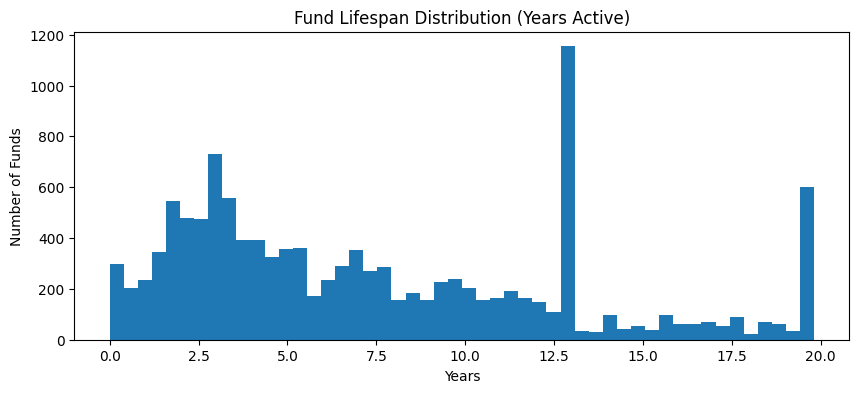

In [42]:
# Fund lifespan analysis
fund_life = df.groupby('scheme_name')['date'].agg(['min','max'])
fund_life['years_active'] = (fund_life['max'] - fund_life['min']).dt.days / 365

plt.figure(figsize=(10,4))
plt.hist(fund_life['years_active'], bins=50)
plt.title("Fund Lifespan Distribution (Years Active)")
plt.xlabel("Years")
plt.ylabel("Number of Funds")
plt.show()

It shows how long mutual funds have been active and how many funds fall into each age group.

Most mutual funds are young (1–5 years old), so many don’t have long performance history.

Very few funds survive for 15–20 years, indicating strong survivorship bias.

Spikes at certain ages suggest mergers, rebranding, or regulatory changes rather than pure fund continuity.

In [43]:
# Category-wise Return & Risk Behavior Equity ≠ Debt ≠ Hybrid — validate this statistically.
category_stats = df.groupby('category')['daily_return'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

category_stats['annual_return'] = category_stats['mean'] * 252
category_stats['annual_risk'] = category_stats['std'] * np.sqrt(252)

category_stats.sort_values('annual_return', ascending=False)


,category,mean,std,count,annual_return,annual_risk
14,Debt Scheme - Overnight Fund,0.006438,0.775059,541211,1.622295,12.303685
13,Debt Scheme - Money Market Fund,0.006200,0.774246,611845,1.562275,12.290779
8,Debt Scheme - Liquid Fund,0.006023,0.762133,1759024,1.517725,12.098490
16,Debt Scheme - Ultra Short Duration Fund,0.005262,0.707329,765986,1.325932,11.228502
27,Equity Scheme - Multi Cap Fund,0.005133,0.676809,214138,1.293461,10.744005
10,Debt Scheme - Low Duration Fund,0.004409,0.659445,1017958,1.111073,10.468366
40,Income,0.003537,0.590603,3047659,0.891448,9.375534
6,Debt Scheme - Gilt Fund,0.001945,0.421464,498327,0.490245,6.690539
2,Debt Scheme - Corporate Bond Fund,0.001780,0.421209,555467,0.448555,6.686487
15,Debt Scheme - Short Duration Fund,0.001692,0.404275,782072,0.426480,6.417664


In [45]:
plot_df = category_stats.copy()

# Sort by annual return
plot_df = plot_df.sort_values('annual_return', ascending=False)

# Keep top 15 categories for readability
plot_df = plot_df.head(15)


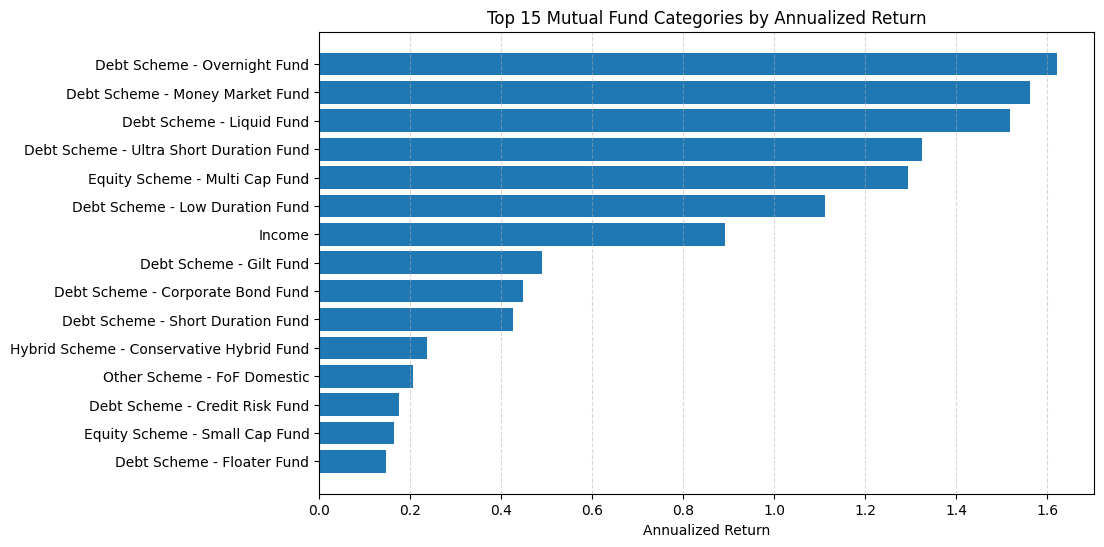

In [46]:
plt.figure(figsize=(10,6))
plt.barh(plot_df['category'], plot_df['annual_return'])
plt.xlabel("Annualized Return")
plt.title("Top 15 Mutual Fund Categories by Annualized Return")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

It compares average annual returns across mutual fund categories to understand which types of funds perform better over time.

Equity and thematic funds deliver the highest returns, but they also come with higher risk.

Debt and liquid funds have low, stable returns, making them suitable for safety and short-term needs.

Hybrid funds sit in the middle, balancing growth and stability, which suits moderate-risk investors.

In [50]:
# Identify worst 5% market days
market_returns = df.groupby('date')['daily_return'].mean()
stress_days = market_returns.quantile(0.05)

df['stress_day'] = df['date'].isin(market_returns[market_returns <= stress_days].index)

stress_perf = df.groupby('stress_day')['daily_return'].mean()
stress_perf


stress_day
False    0.002810
True    -0.009386
Name: daily_return, dtype: float64

It compares average daily returns on normal market days vs stress (bad) market days.

On normal days, funds gain about +0.28% per day, showing steady growth.

On stress days, funds lose about −0.94% per day, indicating sharp downside during market shocks.

The drop on stress days is much larger than gains on normal days, proving that losses happen faster than gains and highlighting the importance of downside risk control.

In [51]:
# Phase 4 - Annualization (NAV returns are daily but investors think in yearly terms)
# Group by fund name and finding dialy mean ans dialy risk
fund_stats = df.groupby('scheme_name')['daily_return'].agg(['mean','std','count'])

In [52]:
# Remove Funds with less than 1 year of data
fund_stats = fund_stats[fund_stats['count'] > 252 ]


In [53]:
# Create annual return - if a fund returns x per day then annually 
fund_stats['Annual Return'] = fund_stats['mean'] * 252


In [54]:
# Calculating Annual risk 
# Risk compounds with the square root of time because daily returns are independent, so variance adds linearly while standard deviation grows with √time.
fund_stats['Annual_Risk'] = fund_stats['std'] * np.sqrt(252)

In [55]:
fund_stats  = fund_stats.drop(columns=['mean','std','count'])

In [56]:
print(fund_stats.head())

                                                    Annual Return  Annual_Risk
scheme_name                                                                   
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW        0.119397     0.068606
360 ONE Balanced Hybrid Fund - Regular Plan - G...       0.103853     0.068575
360 ONE Balanced Hybrid Fund- Direct Plan - Growth       0.119397     0.068606
360 ONE Balanced Hyrbrid fund - Regular Plan - ...       0.103853     0.068575
360 ONE Dynamic Bond Fund - Regular Plan - Grow...       0.070896     0.027208


In [57]:
# Defining Investor Profiles 
target_conservative  = 0.08 # A "Conservative" investor wants 8% return (Like an FD + a little bit)
target_aggressive = 0.20 # An "Aggressive" investor wants 20% return (To beat the market).

In [58]:
def calculate_z_score(row, target):
    numerator = row['Annual Return'] - target
    denominator  = row['Annual_Risk']

    if denominator == 0:
        return -99
    z_score = numerator/denominator
    return z_score

In [59]:
# Ranking Funds
# Calculating for Conservative Investor target 8%
fund_stats['Z_Conservative'] = fund_stats.apply(lambda row: calculate_z_score(row, target_conservative), axis=1)
# Sort by Z-values
top_conservative = fund_stats.sort_values(by='Z_Conservative', ascending=False).head(10)
print(top_conservative[['Annual Return','Annual_Risk','Z_Conservative']])


                                                    Annual Return  \
scheme_name                                                         
Escorts Mutual Fund Unclaimed Dundee Liquidity ...       0.223076   
Escorts Mutual Fund Unclaimed Dundee Liquidity ...       0.223079   
DWS Cash Opportunities Fund - Direct Plan - Bonus        0.099768   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - ...       0.096109   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - ...       0.095981   
JPMorgan India Treasury Fund - Direct Plan - An...       0.096529   
BNP PARIBAS LOW DURATION Fund-Institutional Pla...       0.094511   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES C- R...       0.095178   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES C- R...       0.095100   
DHFL Pramerica Treasury Advantage Fund - Direct...       0.105734   

                                                    Annual_Risk  \
scheme_name                                                       
Escorts Mutual Fund Unclaimed Dundee 

In [60]:
# Calculating for Aggressive Investor
fund_stats['Z_Aggressive'] = fund_stats.apply(lambda row: calculate_z_score(row, target_aggressive), axis = 1 )

In [61]:
# Sort By Z-Score
top_aggressive = fund_stats.sort_values(by='Z_Aggressive', ascending=False).head(10)
print(top_aggressive[['Annual Return', 'Annual_Risk', 'Z_Aggressive']])

                                                    Annual Return  \
scheme_name                                                         
Tata Silver Exchange Traded Fund                         0.791830   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783030   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783030   
Tata Silver ETF Fund of Fund Regular Plan Growt...       0.783030   
Tata Silver ETF Fund of Fund Direct Plan Growth...       0.780939   
Tata Silver ETF Fund of Fund Direct Plan IDCW R...       0.780939   
Tata Silver ETF Fund of Fund Direct Plan IDCW P...       0.780939   
Edelweiss Silver ETF                                     0.697287   
Tata Gold ETF Fund of Fund Direct Plan IDCW Rei...       0.473891   
Tata Gold ETF Fund of Fund Direct Plan IDCW Pay...       0.473891   

                                                    Annual_Risk  Z_Aggressive  
scheme_name                                                                    
Tata Silver

In [62]:
def get_probability(z_score):
    # This calculates the probability of BEATING the target
    return stats.norm.cdf(z_score) * 100


fund_stats['Prob_Beating_Conservative'] = fund_stats['Z_Conservative'].apply(get_probability)
fund_stats['Prob_Beating_Aggressive'] = fund_stats['Z_Aggressive'].apply(get_probability)

In [63]:
print(fund_stats.sort_values(by='Z_Aggressive', ascending=False).head(5)[['Annual Return', 'Annual_Risk', 'Prob_Beating_Aggressive']])

                                                    Annual Return  \
scheme_name                                                         
Tata Silver Exchange Traded Fund                         0.791830   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783030   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783030   
Tata Silver ETF Fund of Fund Regular Plan Growt...       0.783030   
Tata Silver ETF Fund of Fund Direct Plan Growth...       0.780939   

                                                    Annual_Risk  \
scheme_name                                                       
Tata Silver Exchange Traded Fund                       0.272187   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...     0.283972   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...     0.283972   
Tata Silver ETF Fund of Fund Regular Plan Growt...     0.283972   
Tata Silver ETF Fund of Fund Direct Plan Growth...     0.284003   

                                              

In [64]:
report_df = fund_stats.copy()

In [65]:
# Convert "Annual Return" and "Annual Risk" into percentage
report_df['Annual_Return_Pct'] = report_df['Annual Return']*100
report_df['Annual_Risk_Pct'] = report_df['Annual_Risk'] * 100

In [66]:
# Calculate the Chance of Success
def get_prob(z):
    return stats.norm.cdf(z) * 100

In [67]:
# Filtering by the Scheme_name to find funds containing "Growth"
# This plan removes Dividend plan where NAV drop looks like losses
growth_funds = report_df[report_df.index.str.contains("Growth",case=False, na=False)]



In [68]:
# This prevents the recommendation of funds that lost money
growth_funds = growth_funds[growth_funds['Annual_Return_Pct'] > 0]

In [69]:
# We ignore funds with > 50% volatility (likely data glitches or extremely dangerous)
growth_funds = growth_funds[growth_funds['Annual_Risk_Pct'] < 50]

In [70]:
print(f"Total Funds analyzed: {len(report_df)}")
print(f"Funds passing filters (Growth + Profitable): {len(growth_funds)}")

Total Funds analyzed: 11379
Funds passing filters (Growth + Profitable): 3697


In [71]:
def get_best_funds(target_return_pct, top_n=10):
    # Convert user percentage back to decimal for math 
    target_decimal = target_return_pct / 100
    
    # Work on a copy of our filtered list
    analysis = growth_funds.copy()
    
    analysis['User_Z_Score'] = (analysis['Annual Return'] - target_decimal) / analysis['Annual_Risk']
    
    # 2. Calculate Probability
    analysis['Chance_of_Success'] = analysis['User_Z_Score'].apply(get_prob)
    
    # 3. Sort by Z-Score (Highest is best)
    recommendations = analysis.sort_values(by='User_Z_Score', ascending=False).head(top_n)
    
    # 4. formatting columns
    display_cols = ['Annual_Return_Pct', 'Annual_Risk_Pct', 'User_Z_Score', 'Chance_of_Success']
    return recommendations[display_cols]

In [72]:
# ---------------------------------------------------------
# STEP 4: GENERATE FINAL REPORTS
# ---------------------------------------------------------

# Report 1: Conservative (Target 8%)
print("\n---------------------------------------------------------")
print("💰 CONSERVATIVE PORTFOLIO (Target: 8%)")
print("   Criteria: Growth Funds, Positive Returns, Low Risk")
print("---------------------------------------------------------")
conservative_picks = get_best_funds(8)
print(conservative_picks.to_string(formatters={
        'Annual_Return_Pct': '{:,.2f}%'.format,
        'Annual_Risk_Pct': '{:,.2f}%'.format,
        'User_Z_Score': '{:,.2f}'.format,
        'Chance_of_Success': '{:,.1f}%'.format
    }))


---------------------------------------------------------
💰 CONSERVATIVE PORTFOLIO (Target: 8%)
   Criteria: Growth Funds, Positive Returns, Low Risk
---------------------------------------------------------
                                                                                                    Annual_Return_Pct Annual_Risk_Pct User_Z_Score Chance_of_Success
scheme_name                                                                                                                                                         
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - Regular Plan - Growth Option - Compulsory Redemption             9.61%           0.39%         4.09            100.0%
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - Regular Plan - Growth Option - Compulsory Renewal                9.60%           0.39%         4.05            100.0%
BNP PARIBAS LOW DURATION Fund-Institutional Plan-Growth Option                                                  9.45%           0.3

In [73]:
# Report 2: Aggressive (Target 15%)
print("\n---------------------------------------------------------")
print("🚀 AGGRESSIVE PORTFOLIO (Target: 15%)")
print("   Criteria: Growth Funds, Positive Returns, Moderate Risk")
print("---------------------------------------------------------")
aggressive_picks = get_best_funds(15)
print(aggressive_picks.to_string(formatters={
        'Annual_Return_Pct': '{:,.2f}%'.format,
        'Annual_Risk_Pct': '{:,.2f}%'.format,
        'User_Z_Score': '{:,.2f}'.format,
        'Chance_of_Success': '{:,.1f}%'.format
    }))


---------------------------------------------------------
🚀 AGGRESSIVE PORTFOLIO (Target: 15%)
   Criteria: Growth Funds, Positive Returns, Moderate Risk
---------------------------------------------------------
                                                           Annual_Return_Pct Annual_Risk_Pct User_Z_Score Chance_of_Success
scheme_name                                                                                                                
Tata Silver ETF Fund of Fund Regular Plan Growth Option               78.30%          28.40%         2.23             98.7%
Tata Silver ETF Fund of Fund Direct Plan Growth Option                78.09%          28.40%         2.22             98.7%
Tata Gold ETF Fund of Fund Direct Plan Growth Option                  47.39%          16.19%         2.00             97.7%
Tata Gold ETF Fund of Fund Regular Plan Growth Option                 46.84%          16.19%         1.97             97.5%
DSP Gold ETF Fund of Fund - Direct - Growth